<a href="https://colab.research.google.com/github/4232177191/project1/blob/main/neumerical_to_cattegorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

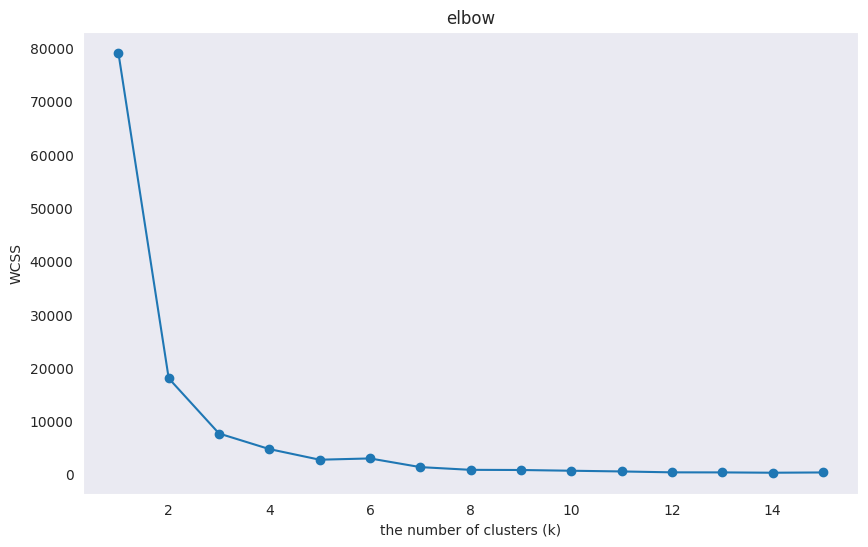

the optimal number of clusters: 6
داده‌ها برحسب کلاسترها با مینیمم و ماکزیمم:
   Cluster                                              Value  min  max
0        0  [88, 100, 93, 96, 93, 92, 89, 86, 94, 93, 91, ...   86  100
1        1  [45, 32, 49, 41, 42, 37, 49, 49, 48, 41, 35, 3...   32   49
2        2  [22, 22, 21, 17, 14, 21, 15, 24, 24, 27, 25, 1...   14   30
3        3  [55, 57, 63, 65, 64, 53, 51, 53, 61, 68, 63, 5...   51   68
4        4             [7, 7, 5, 11, 6, 4, 1, 10, 5, 6, 8, 5]    1   11
5        5  [70, 74, 75, 72, 78, 79, 79, 83, 76, 80, 75, 8...   70   83


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# تولید 90 عدد رندوم بین 1 تا 100
data = np.random.randint(1, 101, size=(90, 1))

# استفاده از الگوریتم K-Means و روش آرنج برای تعیین بهترین تعداد کلاستر
wcss = []  # مجموع مربعات درون کلاسترها
max_k = 15  # حداکثر تعداد کلاسترها

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # ذخیره مجموع مربعات درون کلاسترها

# رسم نمودار روش آرنج
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.title('elbow')
plt.xlabel('the number of clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# محاسبه نقطه عطف (Elbow) به صورت خودکار
diff = np.diff(wcss)
diff2 = np.diff(diff)

# پیدا کردن نقطه عطف
optimal_k = np.argmin(diff2) + 2  # +2 برای تنظیم ایندکس به تعداد کلاستر

# چاپ تعداد کلاستر بهینه
print(f"the optimal number of clusters: {optimal_k}")

# اجرای K-Means با تعداد کلاسترهای بهینه
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data)

# اضافه کردن برچسب کلاستر به داده‌ها
data_with_labels = np.hstack((data, kmeans.labels_.reshape(-1, 1)))  # اضافه کردن برچسب کلاستر

# تبدیل به DataFrame برای ویرایش راحت‌تر
df = pd.DataFrame(data_with_labels, columns=['Value', 'Cluster'])

# گروه‌بندی و نمایش مقادیر در یک ردیف برای هر برچسب کلاستر
result = df.groupby('Cluster')['Value'].agg(lambda x: list(x)).reset_index()

# گروه‌بندی برای محاسبه مینیمم و ماکزیمم برای هر کلاستر
min_max = df.groupby('Cluster')['Value'].agg(['min', 'max']).reset_index()

# ادغام نتایج
final_result = pd.merge(result, min_max, on='Cluster')

# چاپ داده‌های گروه‌بندی شده با مینیمم و ماکزیمم برای هر کلاستر
print("داده‌ها برحسب کلاسترها با مینیمم و ماکزیمم:")
print(final_result)

In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from seaborn import set_style
set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [21]:
#بارگذاری دیتا ست diabetes
diabet=load_diabetes()
data=pd.DataFrame(diabet.data ,columns=diabet.feature_names)
data["target"]=diabet.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [22]:
data.shape


(442, 11)

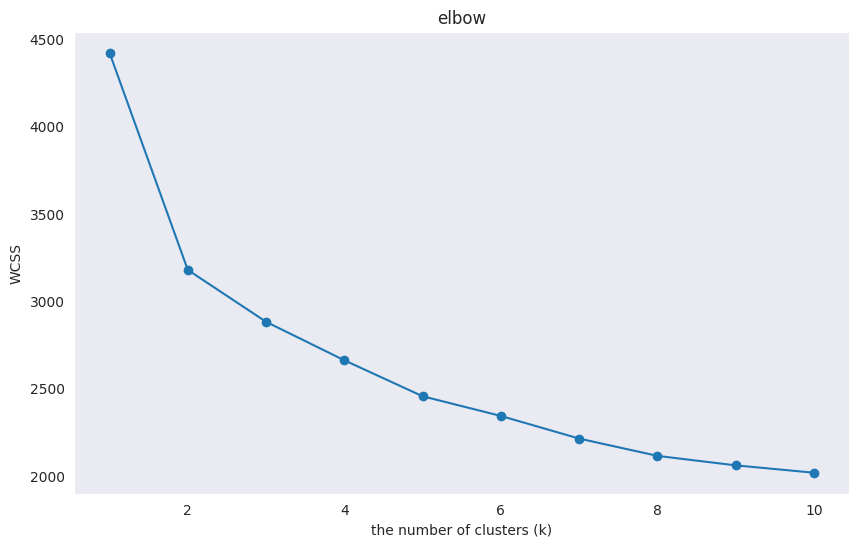

the optimal number of clusters: 6

 information of dataset after changes "target":
          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173

In [23]:

# پیش‌پردازش داده‌ها (استانداردسازی)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])  # تمامی ستون‌ها به جز ستون نتیجه

# استفاده از K-Means برای تعیین تعداد کلاستر
wcss = []  # مجموع مربعات درون کلاسترها
max_k = 10  # حداکثر تعداد کلاسترها

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  # ذخیره مجموع مربعات درون کلاسترها

# رسم نمودار روش آرنج
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.title('elbow')
plt.xlabel('the number of clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# محاسبه نقطه عطف (Elbow) به صورت خودکار
diff = np.diff(wcss)
diff2 = np.diff(diff)

# پیدا کردن نقطه عطف
optimal_k = np.argmin(diff2) + 2  # +2 برای تنظیم ایندکس به تعداد کلاستر

# چاپ تعداد کلاستر بهینه
print(f"the optimal number of clusters: {optimal_k}")

# اجرای K-Means با تعداد کلاسترهای بهینه
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# اضافه کردن برچسب کلاستر به داده‌ها
data['Cluster'] = kmeans.labels_

#
data['target'] = data['target'].astype('category')

# نمایش اطلاعات داده‌ها
print("\n information of dataset after changes \"target\":")
final_data = data.copy()
print(final_data)


# محاسبه مینیمم و ماکزیمم هر کلاستر
#min_max = data.groupby('Cluster').agg(['min', 'max']).reset_index()

# چاپ داده‌های گروه‌بندی شده با مینیمم و ماکزیمم برای هر کلاستر
print("min & max of every cluster:")
#print(min_max)

In [24]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,Cluster
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,4
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,5
